In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import WormFunctions as wrm
import seaborn as sns

from importlib import reload 
sns.set_theme(style='white')

(41, 729)


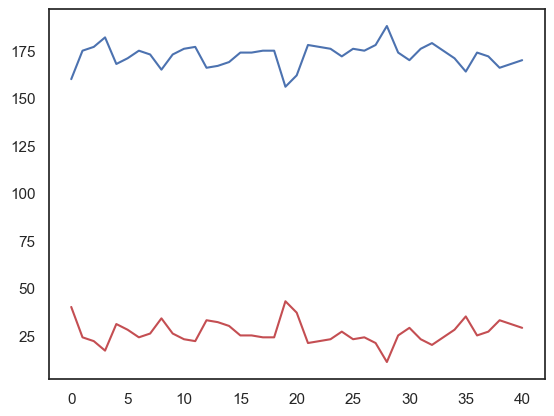

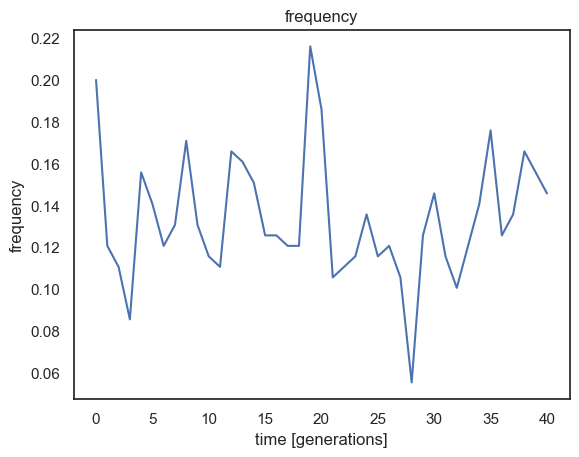

In [19]:
N=200 #or 2000
name='NewJacqExp/NewJacqExp'+str(N)

R=1
for i in range (R):
    this_name=name+'_i'+str(i)
    dynamics_h=np.load(this_name+'dynamics_h.npy')
    dynamics_m=np.load(this_name+'dynamics_m.npy')
    print (np.shape(dynamics_h))
    all_males=np.sum(dynamics_m,1)
    all_hermaphrodites=np.sum(dynamics_h,1)
    plt.plot(all_males,'r')
    plt.plot(all_hermaphrodites,'b')
    plt.show()
    plt.plot(all_males/(all_males+all_hermaphrodites))
    
plt.ylabel('frequency')
plt.xlabel('time [generations]')
plt.title('frequency')
plt.show()



In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_simulated_dynamics(N=200, R=100):
    base_name = 'NewJacqExp/NewJacqExp' + str(N)

    # Lists to store dynamics data for all individual runs
    all_males_dynamics = []
    all_hermaphrodites_dynamics = []
    all_male_frequency = []

    for i in range(R):
        this_name = base_name + '_i' + str(i)
        try:
            dynamics_h = np.load(this_name + 'dynamics_h.npy')
            dynamics_m = np.load(this_name + 'dynamics_m.npy')

            total_males_per_run = np.sum(dynamics_m, 1)
            total_hermaphrodites_per_run = np.sum(dynamics_h, 1)
            male_frequency = total_males_per_run/(total_males_per_run+total_hermaphrodites_per_run)

            all_males_dynamics.append(total_males_per_run)
            all_hermaphrodites_dynamics.append(total_hermaphrodites_per_run)

            all_male_frequency.append(male_frequency)

        except FileNotFoundError:
            print(f"Warning: File not found for run {i} ({this_name}). Skipping this run.")
            continue
        except Exception as e:
            print(f"An error occurred loading data for run {i}: {e}. Skipping this run.")
            continue

    if not all_males_dynamics or not all_hermaphrodites_dynamics:
        print("No data was loaded successfully. Exiting.")
        return

    # Convert lists of arrays to a single NumPy array for easier calculations
    all_males_dynamics_stacked = np.vstack(all_males_dynamics)
    all_hermaphrodites_dynamics_stacked = np.vstack(all_hermaphrodites_dynamics)
    all_male_frequency_stacked = np.vstack(all_male_frequency)

    # --- Plotting all individual curves on the same graph ---
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # Subplot for all male dynamics
    for run_data in all_males_dynamics_stacked:
        plt.plot(run_data, color='red', alpha=0.1, linewidth=0.8) # Light red for individual runs
    plt.plot(np.mean(all_males_dynamics_stacked, axis=0), color='darkred', linewidth=2, label='Mean Males')
    plt.title(f'All Individual Male Dynamics (N={N}, R={R})')
    plt.xlabel('Time [generations]')
    plt.ylabel('Number of Individuals')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1) # Subplot for all male dynamics
    for run_data in all_male_frequency_stacked:
        plt.plot(run_data, color='blue', alpha=0.1, linewidth=0.8) # Light red for individual runs
    plt.plot(np.mean(all_males_dynamics_stacked, axis=0), color='blue', linewidth=2, label='Mean Males')
    plt.title(f'All Individual Male Dynamics (N={N}, R={R})')
    plt.xlabel('Time [generations]')
    plt.ylabel('Number of Individuals')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend
    plt.show()




   

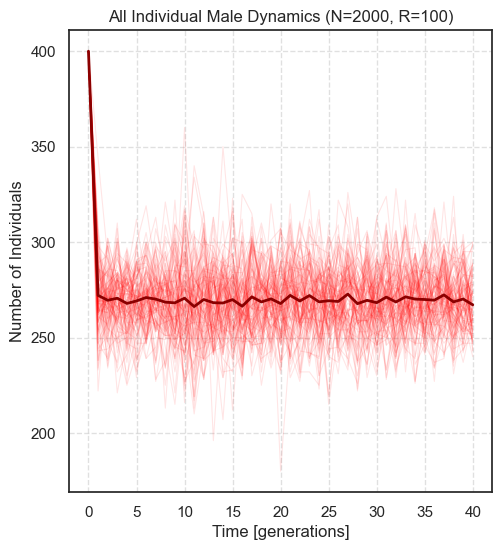

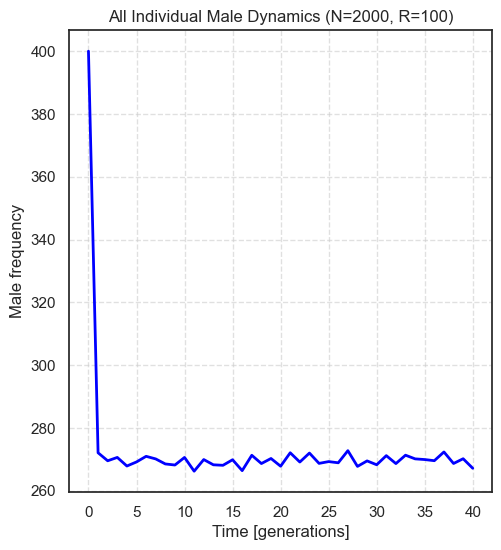

In [55]:
plot_simulated_dynamics(N=2000, R=100)

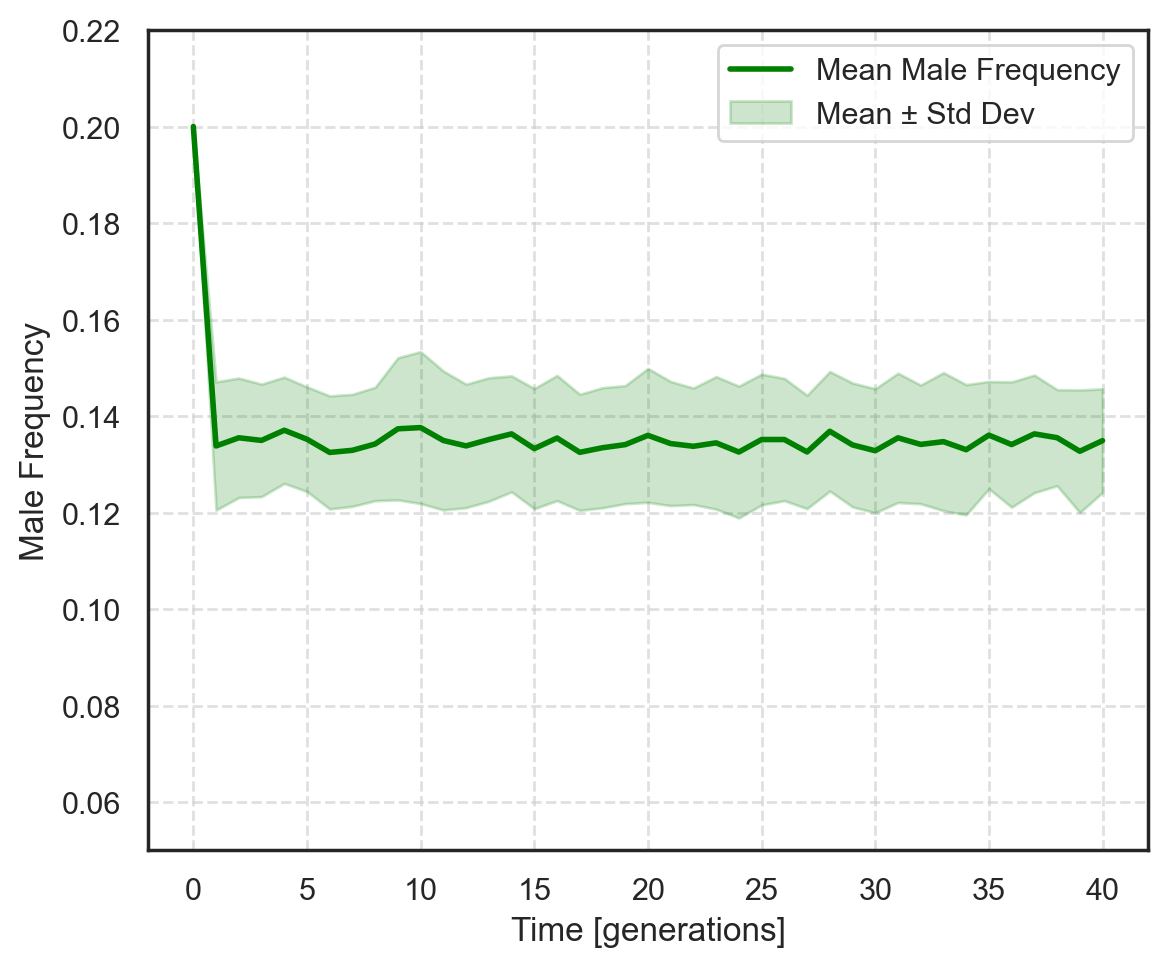

In [108]:


def plot_male_frequency(N=200, R=100):
    if N == 200:
        this_color='blue'
    elif N == 1000:
        this_color='green'
    elif N == 2000:
        this_color = 'red'
    else: 
        this_color = 'black'
        
    """
    Loads pre-simulated dynamics for males and hermaphrodites, plots all curves
    of male frequency, and adds mean and standard deviation visualization using Seaborn.

    Args:
        N (int): A parameter used in the file naming convention (e.g., population size).
        R (int): The number of individual runs to load and process.
    """

    base_name = 'NewJacqExp/NewJacqExp' + str(N)

    # Lists to store dynamics data for all individual runs
    all_males_dynamics = []
    all_hermaphrodites_dynamics = []

    for i in range(R):
        this_name = base_name + '_i' + str(i)
        try:
            dynamics_h = np.load(this_name + 'dynamics_h.npy')
            dynamics_m = np.load(this_name + 'dynamics_m.npy')

            total_males_per_run = np.sum(dynamics_m, 1)
            total_hermaphrodites_per_run = np.sum(dynamics_h, 1)

            all_males_dynamics.append(total_males_per_run)
            all_hermaphrodites_dynamics.append(total_hermaphrodites_per_run)

        except FileNotFoundError:
            print(f"Warning: File not found for run {i} ({this_name}). Skipping this run.")
            continue
        except Exception as e:
            print(f"An error occurred loading data for run {i}: {e}. Skipping this run.")
            continue

    if not all_males_dynamics or not all_hermaphrodites_dynamics:
        print("No data was loaded successfully. Exiting.")
        return

    # Convert lists of arrays to a single NumPy array for easier calculations
    all_males_dynamics_stacked = np.vstack(all_males_dynamics)
    all_hermaphrodites_dynamics_stacked = np.vstack(all_hermaphrodites_dynamics)

    # Calculate frequencies for each run
    total_individuals_per_run = all_males_dynamics_stacked + all_hermaphrodites_dynamics_stacked
    # Avoid division by zero where total_individuals might be zero
    all_male_frequency_stacked = np.divide(all_males_dynamics_stacked, total_individuals_per_run,
                                         out=np.zeros_like(all_males_dynamics_stacked, dtype=float),
                                         where=total_individuals_per_run != 0)


    # --- Plotting all individual male frequency curves with Seaborn mean/std ---
    fig, ax = plt.subplots(dpi=200, figsize=(6, 5))

    # Plot all individual runs first if you want
    #for run_data in all_male_frequency_stacked:
    #    plt.plot(run_data, color=this_color, alpha=0.1, linewidth=0.8)


    # Calculate mean and standard deviation manually to pass to fill_between or for direct plot
    mean_male_frequency = np.mean(all_male_frequency_stacked, axis=0)
    std_male_frequency = np.std(all_male_frequency_stacked, axis=0)
    time_points = np.arange(len(mean_male_frequency))

    # Plot mean
    plt.plot(time_points, mean_male_frequency, color=this_color, linewidth=2, label='Mean Male Frequency')

    # Plot standard deviation using fill_between for clarity, as seaborn lineplot's default is CI
    plt.fill_between(time_points, mean_male_frequency - std_male_frequency,
                     mean_male_frequency + std_male_frequency, color=this_color, alpha=0.2, label='Mean ± Std Dev')

    plt.xlabel('Time [generations]')
    plt.ylabel('Male Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim([0.05,0.22])
    plt.legend()
    plt.tight_layout()
    plt.savefig(base_name+'Male_F'+'.png',dpi=200, bbox_inches='tight')
    plt.show()


# Example usage (make sure your .npy files are correctly located)
plot_male_frequency(N=1000, R=100)
